<a href="https://colab.research.google.com/github/marcosrbenso/data-scence-para-engenharia-de-biossistemas/blob/main/LEB0432_M%C3%A1quinas_e_implementos_agr%C3%ADcolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Material para aula de Máquinas e implementos agrícolas

In [ ]:
!pip install geobr
!pip install sidrapy

In [ ]:
import geobr
import sidrapy
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
brasil = geobr.read_municipality(code_muni="all")
brasil.head()

br = geobr.read_state()
br.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.3355, -72.58477 -..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."


In [ ]:
cafe = sidrapy.get_table(
    table_code="1613",
    territorial_level="6",
    ibge_territorial_code="all",
    variable = "214",
    classifications={"82": "31619,31620"},
    period="last4",
    header='n'
)

cafe.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2021,2021,214,Quantidade produzida,31619,Café (em grão) Arábica
1,6,Município,1017,Toneladas,14742,1100015,Alta Floresta D'Oeste - RO,2021,2021,214,Quantidade produzida,31620,Café (em grão) Canephora
2,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2022,2022,214,Quantidade produzida,31619,Café (em grão) Arábica
3,6,Município,1017,Toneladas,23742,1100015,Alta Floresta D'Oeste - RO,2022,2022,214,Quantidade produzida,31620,Café (em grão) Canephora
4,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2023,2023,214,Quantidade produzida,31619,Café (em grão) Arábica


In [ ]:
cafe["V"] = cafe["V"].replace(['-', '...'], np.nan).astype(float).astype(pd.Int64Dtype())
cafe['D1C'] = cafe['D1C'].astype(int)

cafe_n = cafe.groupby(['D1C','D3N',"D4N"])['V'].mean().reset_index()
cafe_n = cafe_n[cafe_n['V'] > 100]

cafe_brasil = pd.merge(brasil,cafe_n, left_on='code_muni',right_on='D1C')

cafe_arabica = cafe_brasil[cafe_brasil['D4N'].str.contains('Arábica', na=False)]
cafe_canephora = cafe_brasil[cafe_brasil['D4N'].str.contains('Canephora', na=False)]




/tmp/ipython-input-2573884318.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


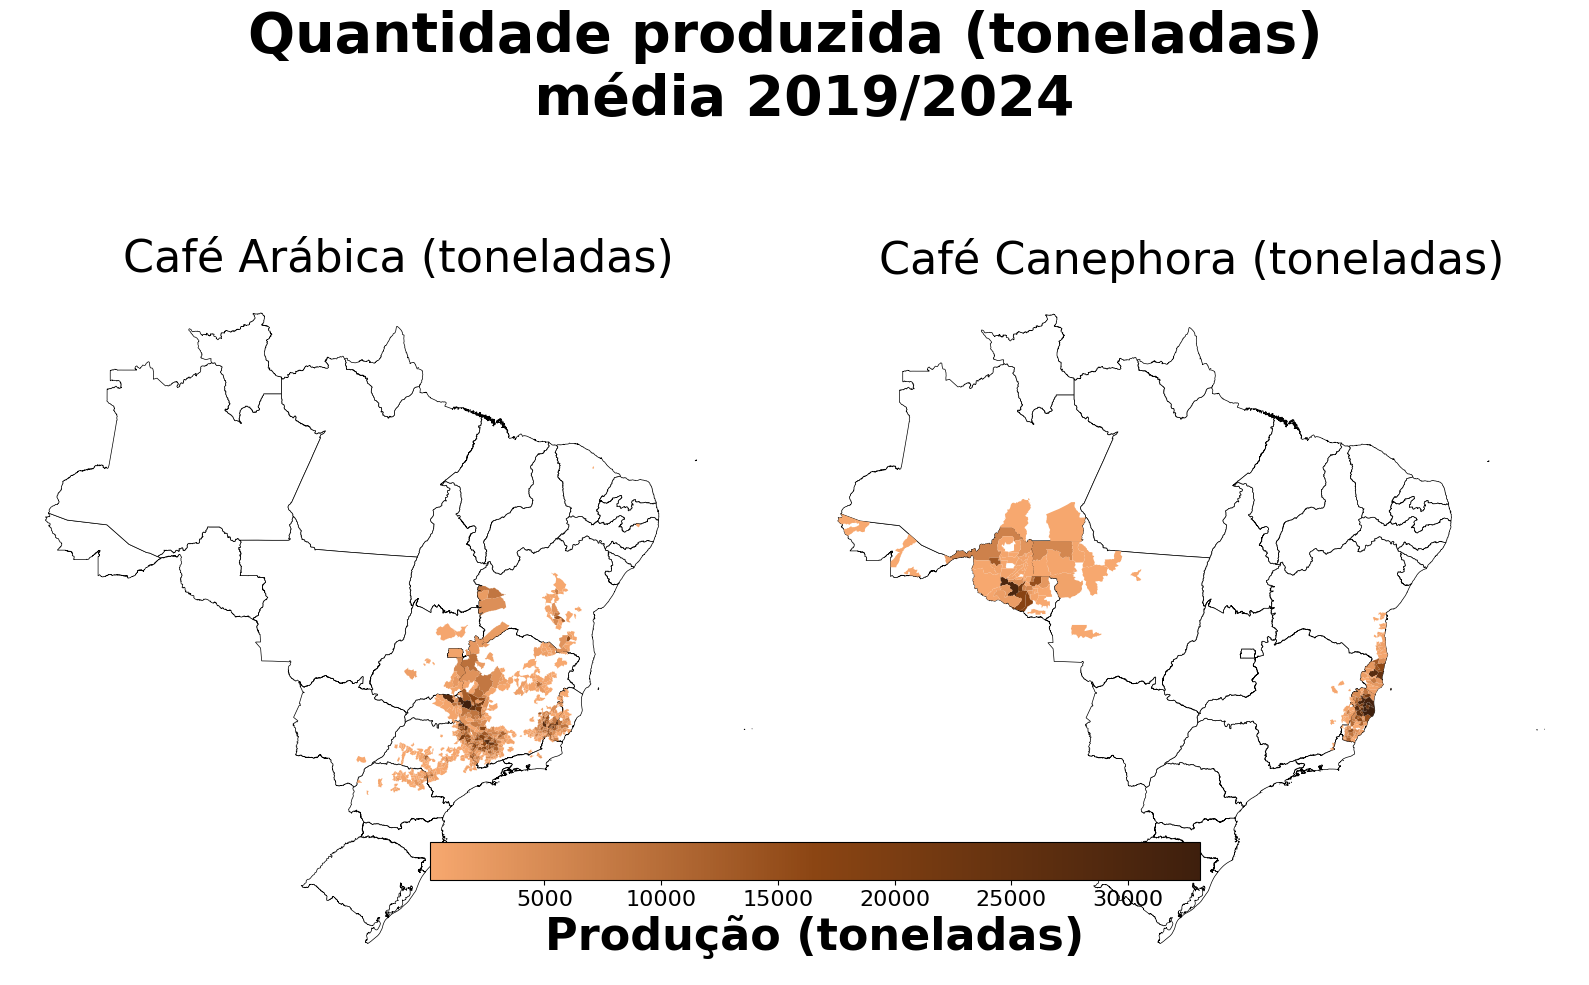

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from matplotlib.colors import Normalize

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

vmin = cafe_brasil["V"].min()
vmax = cafe_brasil["V"].max()*0.5

brown_cmap = LinearSegmentedColormap.from_list("brown_cmap", ["#f7a86f", "#8b4513", "#3e1f0d"])


# --- Café Arábica ---
br.plot(ax=axes[0], color="white", edgecolor="black", linewidth=0.5)  # states
cafe_arabica.plot(column="V",
                  cmap=brown_cmap,
                  linewidth=0,
                  edgecolor="none",
                  legend=False,
                  ax=axes[0],
                  vmin=vmin, vmax=vmax)
axes[0].set_title("Café Arábica (toneladas)", fontsize=32)
axes[0].axis("off")

# --- Café Canephora ---
br.plot(ax=axes[1], color="white", edgecolor="black", linewidth=0.5)  # states
cafe_canephora.plot(column="V",
                    cmap=brown_cmap,
                    linewidth=0.1,
                    edgecolor="none",
                    legend=False,
                    ax=axes[1],
                    vmin=vmin, vmax=vmax)
axes[1].set_title("Café Canephora (toneladas)", fontsize=32)
axes[1].axis("off")

# --- Legenda compartilhada ---
norm = Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap=brown_cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(
    sm,
    ax=axes,
    orientation="horizontal",
    fraction=0.05,
    pad=0.05
)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Produção (toneladas)", fontsize=32, weight="bold")

#plt.legend("",fontsize=32,prop={'size': 32}) # or plt.legend(fontsize=12)
fig.suptitle("Quantidade produzida (toneladas) \n média 2019/2024", fontsize=40, weight="bold")

plt.tight_layout()
plt.show()


In [ ]:
cafe = pd.read_csv("https://portaldeinformacoes.conab.gov.br/downloads/arquivos/LevantamentoCafe.txt",delimiter = ';',encoding = 'latin-1')
cafe.head()

,ano_agricola,safra,uf,produto,id_produto,id_levantamento,dsc_levantamento,area_plantada_mil_ha,producao_mil_t,produtividade_mil_ha_mil_t
0,2017,UNICA,AM,CAFE,7498,1,1º LEV,429.0,7.0,16.3
1,2017,UNICA,AM,CAFE,7498,2,2º LEV,543.0,8.0,14.7
2,2017,UNICA,AM,CAFE,7498,3,3º LEV,504.0,8.0,15.9
3,2017,UNICA,AM,CAFE,7090,99,LEVANT,504.0,8.0,15.9
4,2017,UNICA,BA,CAFE,7090,99,LEVANT,46770.0,2380.0,50.9


Text(0, 0.5, 'Produção (milhares de toneladas)')

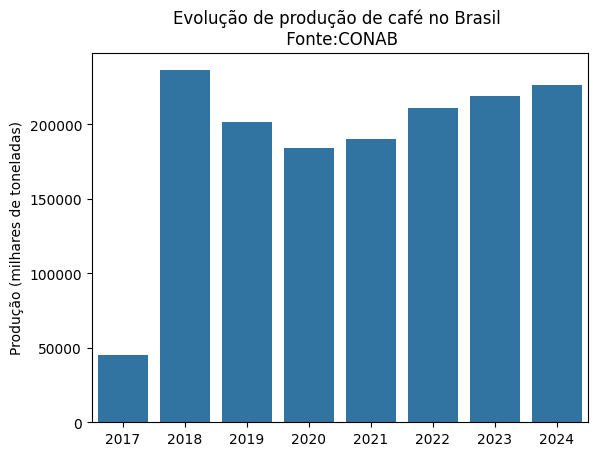

In [ ]:
cafe_total = cafe.groupby(['ano_agricola'])['producao_mil_t'].sum().reset_index()

cafe['ano_agricola'] = cafe['ano_agricola'].astype(int)

ax = sbn.barplot(
    data = cafe[cafe['ano_agricola'] < 2025],
    x = 'ano_agricola',
    y = 'producao_mil_t',
    estimator = 'sum',
    errorbar = None
)

ax.set_title("Evolução de produção de café no Brasil \n Fonte:CONAB")
ax.set_xlabel("")
ax.set_ylabel("Produção (milhares de toneladas)")

Text(0, 0.5, 'Produção (milhares de toneladas)')

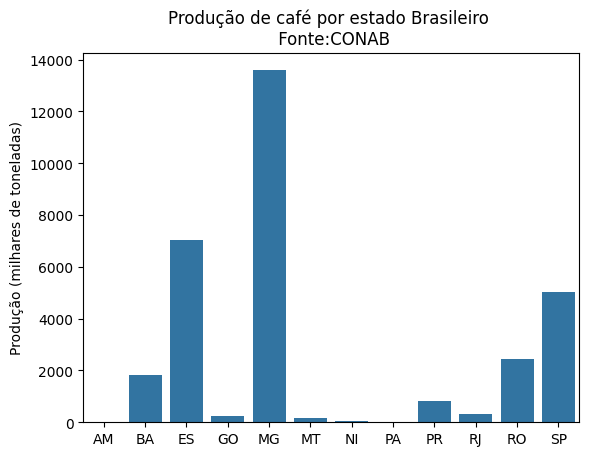

In [ ]:
ax = sbn.barplot(
    data = cafe,
    x = 'uf',
    y = 'producao_mil_t',
    estimator = 'mean',
    errorbar = None
)

ax.set_title("Produção de café por estado Brasileiro \n Fonte:CONAB")
ax.set_xlabel("")
ax.set_ylabel("Produção (milhares de toneladas)")

In [ ]:
algodao = sidrapy.get_table(
    table_code="1612",
    territorial_level="6",
    ibge_territorial_code="all",
    variable = "214",
    classifications={"81": "2689"},
    period="last4",
    header='n'
)

algodao.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2021,2021,214,Quantidade produzida,2689,Algodão herbáceo (em caroço)
1,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2022,2022,214,Quantidade produzida,2689,Algodão herbáceo (em caroço)
2,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2023,2023,214,Quantidade produzida,2689,Algodão herbáceo (em caroço)
3,6,Município,1017,Toneladas,-,1100015,Alta Floresta D'Oeste - RO,2024,2024,214,Quantidade produzida,2689,Algodão herbáceo (em caroço)
4,6,Município,1017,Toneladas,-,1100023,Ariquemes - RO,2021,2021,214,Quantidade produzida,2689,Algodão herbáceo (em caroço)


In [ ]:
algodao["V"] = algodao["V"].replace(['-', '...'], np.nan).astype(float).astype(pd.Int64Dtype())
algodao['D1C'] = algodao['D1C'].astype(int)
algodao_n = algodao.groupby(['D1C'])['V'].mean().reset_index()

algodao_brasil = pd.merge(brasil,algodao_n, left_on='code_muni',right_on='D1C')


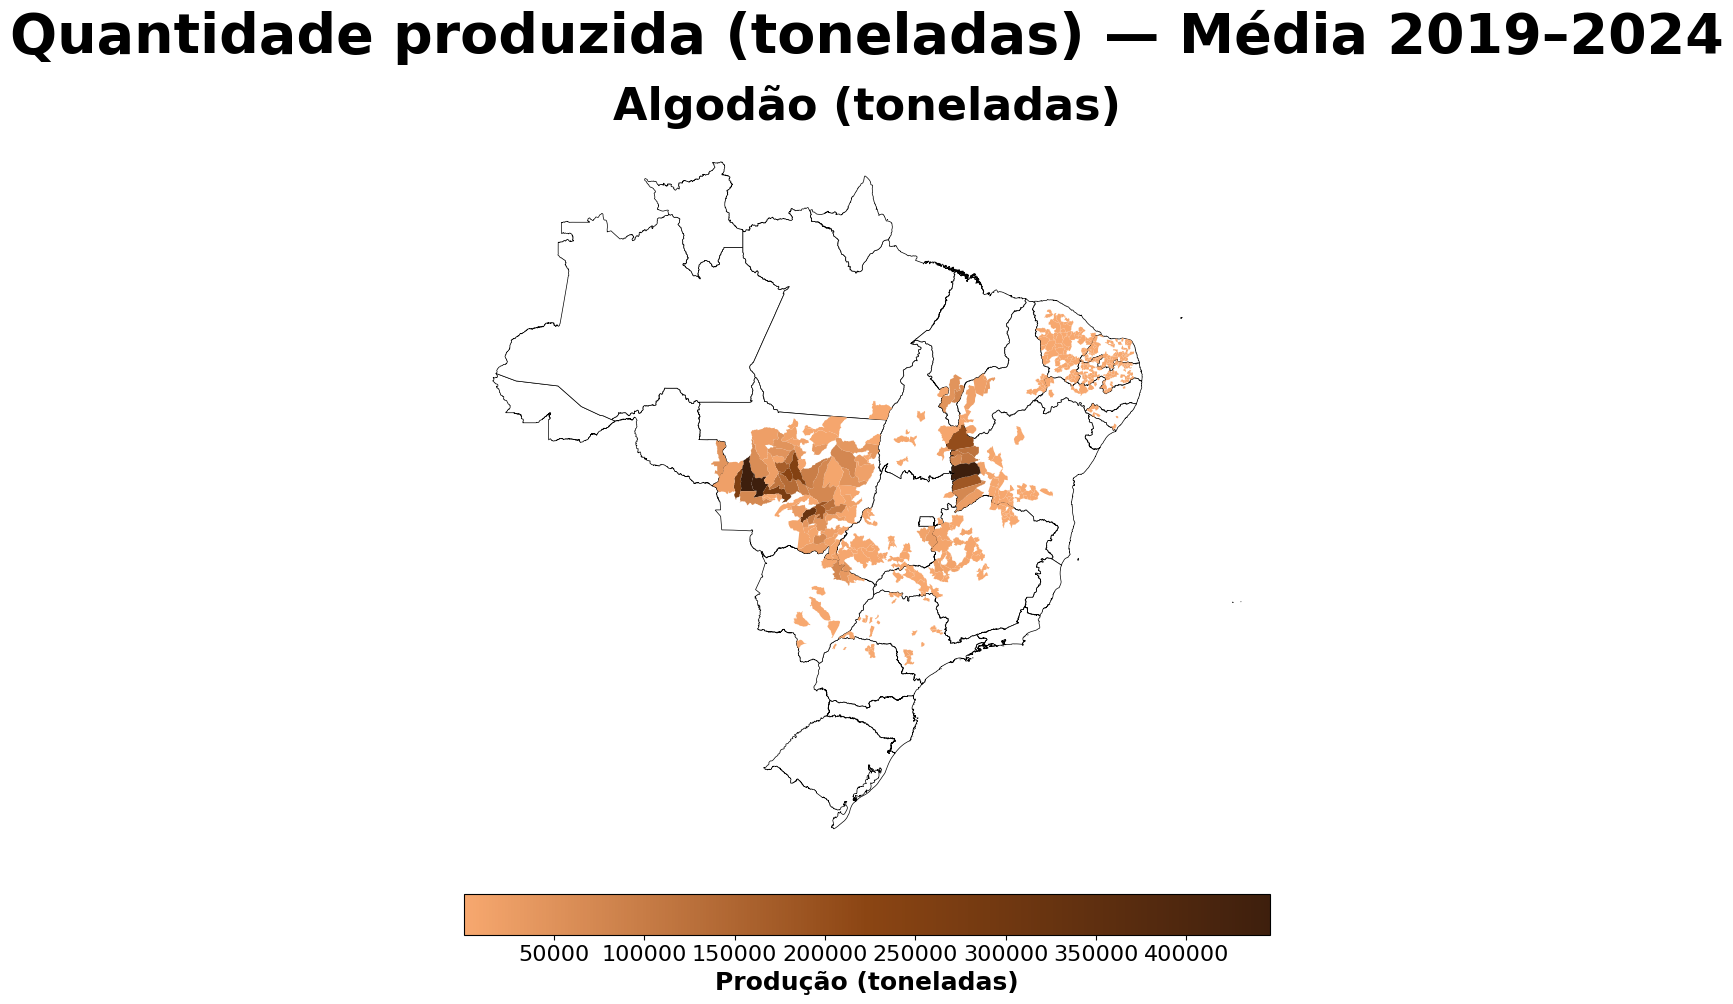

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib as mpl

# --- Escalas e colormap ---
vmin = algodao_brasil["V"].min()
vmax = algodao_brasil["V"].max() * 0.5
brown_cmap = LinearSegmentedColormap.from_list("brown_cmap", ["#f7a86f", "#8b4513", "#3e1f0d"])

# --- Criação da figura e eixos ---
fig, ax = plt.subplots(figsize=(10, 10))

# --- Plotagem do mapa base ---
br.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)

# --- Plotagem da variável ---
algodao_brasil.plot(
    column="V",
    cmap=brown_cmap,
    linewidth=0,
    edgecolor="none",
    legend=False,  # removemos a legenda individual
    ax=ax,
    vmin=vmin, vmax=vmax
)

# --- Título e formatação ---
ax.set_title("Algodão (toneladas)", fontsize=32, weight="bold")
ax.axis("off")

# --- Criação da legenda (colorbar) compartilhada ---
norm = Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap=brown_cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    fraction=0.05,
    pad=0.04
)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Produção (toneladas)", fontsize=18, weight="bold")

# --- Título geral ---
fig.suptitle("Quantidade produzida (toneladas) — Média 2019–2024",
             fontsize=40, weight="bold", y=1.)

plt.tight_layout()
plt.show()


In [ ]:
grains = pd.read_csv('https://portaldeinformacoes.conab.gov.br/downloads/arquivos/SerieHistoricaGraos.txt',delimiter=";",encoding='latin-1')
grains.head()

,ano_agricola,dsc_safra_previsao,uf,produto,id_produto,area_plantada_mil_ha,producao_mil_t,produtividade_mil_ha_mil_t
0,1976/77,UNICA,AL,ALGODAO EM PLUMA,4586,99.3,6.0,0.1
1,1976/77,UNICA,BA,ALGODAO EM PLUMA,4586,123.4,7.0,0.1
2,1976/77,UNICA,CE,ALGODAO EM PLUMA,4586,1296.0,70.0,0.1
3,1976/77,UNICA,GO,ALGODAO EM PLUMA,4586,73.1,28.2,0.4
4,1976/77,UNICA,MA,ALGODAO EM PLUMA,4586,44.4,2.0,0.0


In [ ]:
grains_algodao = grains[grains['produto'].str.contains('ALGODAO')]
grains_algodao["ano_agricola_int"] = grains_algodao["ano_agricola"].str.split("/").str[0].astype(int)

grains_algodao.head()

/tmp/ipython-input-2043370259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grains_algodao["ano_agricola_int"] = grains_algodao["ano_agricola"].str.split("/").str[0].astype(int)


,ano_agricola,dsc_safra_previsao,uf,produto,id_produto,area_plantada_mil_ha,producao_mil_t,produtividade_mil_ha_mil_t,ano_agricola_int
0,1976/77,UNICA,AL,ALGODAO EM PLUMA,4586,99.3,6.0,0.1,1976
1,1976/77,UNICA,BA,ALGODAO EM PLUMA,4586,123.4,7.0,0.1,1976
2,1976/77,UNICA,CE,ALGODAO EM PLUMA,4586,1296.0,70.0,0.1,1976
3,1976/77,UNICA,GO,ALGODAO EM PLUMA,4586,73.1,28.2,0.4,1976
4,1976/77,UNICA,MA,ALGODAO EM PLUMA,4586,44.4,2.0,0.0,1976


Text(0, 0.5, 'Produção (milhares de toneladas)')

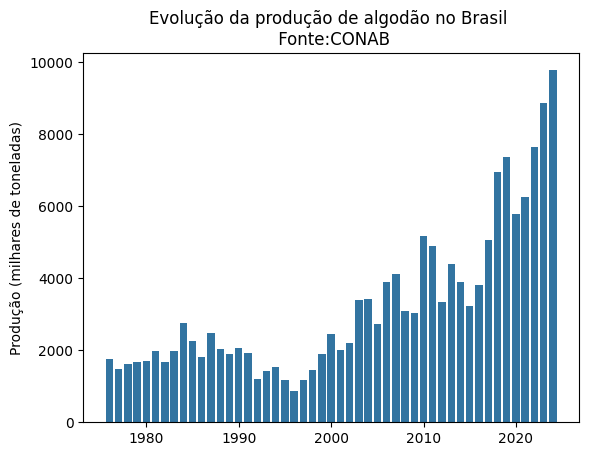

In [ ]:
ax = sbn.barplot(
    data = grains_algodao,
    x = 'ano_agricola_int',
    y = 'producao_mil_t',
    native_scale = True,
    estimator = 'sum',
    errorbar = None
)

ax.set_title("Evolução da produção de algodão no Brasil \n Fonte:CONAB")
ax.set_xlabel("")
ax.set_ylabel("Produção (milhares de toneladas)")

<Axes: xlabel='uf', ylabel='producao_mil_t'>

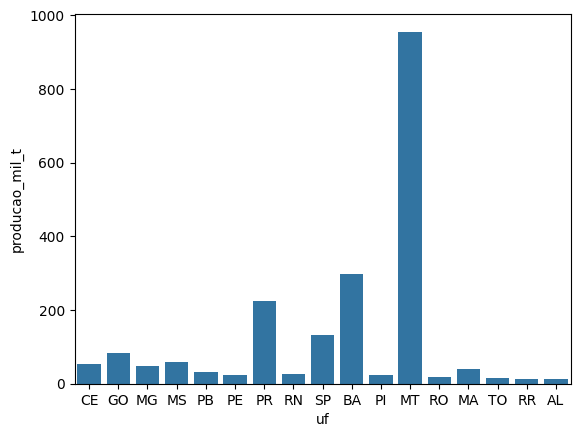

In [ ]:

sbn.barplot(
    data = grains_algodao[grains_algodao['producao_mil_t'] > 10],
    x = 'uf',
    y = 'producao_mil_t',
    estimator = 'mean',
    errorbar = None
)

In [ ]:
data_batata_inglesa = sidrapy.get_table(
    table_code="1001",
    territorial_level="6",
    ibge_territorial_code="all",
    variable = "214",
    classifications={"81": "117989,117990,117994"},
    period="last5",
    header='n'
)




In [ ]:
data_batata_inglesa["V"] = data_batata_inglesa["V"].replace(['-', '...'], np.nan).astype(float).astype(pd.Int64Dtype())
data_batata_inglesa['D1C'] = data_batata_inglesa['D1C'].astype(float)

data_batata_inglesa_n = data_batata_inglesa.groupby(['D1C','D3N',"D4N"])['V'].mean().reset_index()

data_batata_inglesa_brasil = pd.merge(brasil,data_batata_inglesa_n, left_on='code_muni',right_on='D1C')

batata1 = data_batata_inglesa_brasil[data_batata_inglesa_brasil['D4N'].str.contains('1', na=False)]
batata2 = data_batata_inglesa_brasil[data_batata_inglesa_brasil['D4N'].str.contains('2', na=False)]
batata3 = data_batata_inglesa_brasil[data_batata_inglesa_brasil['D4N'].str.contains('3', na=False)]




In [ ]:
batata1["V"].mean()

np.float64(2711.4592592592617)

/tmp/ipython-input-1374437210.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1., 0.95])  # deixa espaço na parte inferior


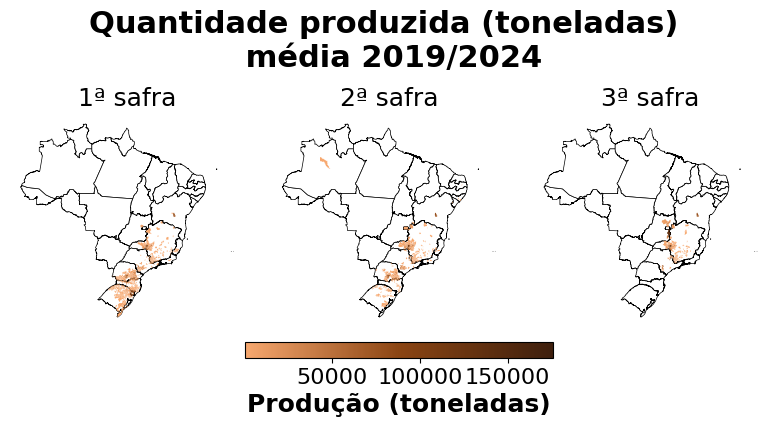

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from matplotlib.colors import Normalize

fig, axes = plt.subplots(1, 3, figsize=(8, 4))

vmin = batata3["V"].min()
vmax = batata3["V"].max()

brown_cmap = LinearSegmentedColormap.from_list("brown_cmap", ["#f7a86f", "#8b4513", "#3e1f0d"])


# --- Café Arábica ---
br.plot(ax=axes[0], color="white", edgecolor="black", linewidth=0.5)  # states
batata1.plot(column="V",
                  cmap=brown_cmap,
                  linewidth=0,
                  edgecolor="none",
                  legend=False,
                  ax=axes[0],
                  vmin=vmin, vmax=vmax)
axes[0].set_title("1ª safra", fontsize=18)
axes[0].axis("off")

# --- Café Canephora ---
br.plot(ax=axes[1], color="white", edgecolor="black", linewidth=0.5)  # states
batata2.plot(column="V",
                    cmap=brown_cmap,
                    linewidth=0.1,
                    edgecolor="none",
                    legend=False,
                    ax=axes[1],
                    vmin=vmin, vmax=vmax)
axes[1].set_title("2ª safra", fontsize=18)
axes[1].axis("off")


br.plot(ax=axes[2], color="white", edgecolor="black", linewidth=0.5)  # states
batata3.plot(column="V",
                    cmap=brown_cmap,
                    linewidth=0.1,
                    edgecolor="none",
                    legend=False,
                    ax=axes[2],
                    vmin=vmin, vmax=vmax)
axes[2].set_title("3ª safra", fontsize=18)
axes[2].axis("off")

# --- Legenda compartilhada ---
norm = Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap=brown_cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(
    sm,
    ax=axes,
    orientation="horizontal",
    fraction=0.05,
    pad=0.15
)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Produção (toneladas)", fontsize=18, weight="bold")

#plt.legend("",fontsize=32,prop={'size': 32}) # or plt.legend(fontsize=12)
fig.suptitle("Quantidade produzida (toneladas) \n média 2019/2024", fontsize=22, weight="bold")

# --- Ajuste final de layout ---
plt.tight_layout(rect=[0, 0.15, 1., 0.95])  # deixa espaço na parte inferior
plt.show()


In [ ]:
data_batata_inglesa_br = sidrapy.get_table(
    table_code="1001",
    territorial_level="1",
    ibge_territorial_code="all",
    variable = "109,214",
    classifications={"81": "117989,117990,117994"},
    period="all",
    header='n'
)

data_batata_inglesa_br.head()


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,1,Brasil,1006,Hectares,74798,1,Brasil,2003,2003,109,Área plantada,117989,Batata-inglesa - 1ª safra
1,1,Brasil,1006,Hectares,51062,1,Brasil,2003,2003,109,Área plantada,117990,Batata-inglesa - 2ª safra
2,1,Brasil,1006,Hectares,26122,1,Brasil,2003,2003,109,Área plantada,117994,Batata-inglesa - 3ª safra
3,1,Brasil,1017,Toneladas,1404056,1,Brasil,2003,2003,214,Quantidade produzida,117989,Batata-inglesa - 1ª safra
4,1,Brasil,1017,Toneladas,985917,1,Brasil,2003,2003,214,Quantidade produzida,117990,Batata-inglesa - 2ª safra


<Axes: xlabel='D2N', ylabel='V2'>

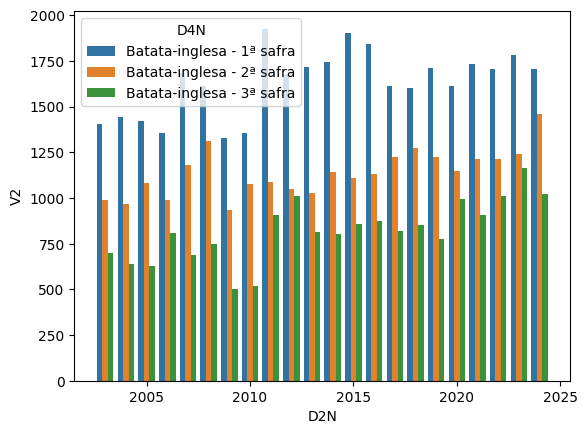

In [ ]:
data_batata_inglesa_br['V'] = data_batata_inglesa_br['V'].replace(['-', '...'], np.nan).astype(float).astype(pd.Int64Dtype())
data_batata_inglesa_br['V2'] = data_batata_inglesa_br['V']/1000
data_batata_inglesa_br['D2N'] = data_batata_inglesa_br['D2N'].astype(float)

sbn.barplot(
    data = data_batata_inglesa_br[data_batata_inglesa_br["D3N"]=="Quantidade produzida"],
    x = 'D2N',
    y = 'V2',
     native_scale = True,
    estimator = 'sum',
    errorbar = None,
    hue = 'D4N'
)

In [ ]:
data_batata_inglesa_uf = sidrapy.get_table(
    table_code="1001",
    territorial_level="3",
    ibge_territorial_code="all",
    variable = "109,214",
    classifications={"81": "117989,117990,117994"},
    period="last5",
    header='n'
)

data_batata_inglesa_uf.head()



,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,3,Unidade da Federação,1006,Hectares,...,13,Amazonas,2020,2020,109,Área plantada,117989,Batata-inglesa - 1ª safra
1,3,Unidade da Federação,1006,Hectares,...,13,Amazonas,2020,2020,109,Área plantada,117990,Batata-inglesa - 2ª safra
2,3,Unidade da Federação,1006,Hectares,...,13,Amazonas,2020,2020,109,Área plantada,117994,Batata-inglesa - 3ª safra
3,3,Unidade da Federação,1017,Toneladas,...,13,Amazonas,2020,2020,214,Quantidade produzida,117989,Batata-inglesa - 1ª safra
4,3,Unidade da Federação,1017,Toneladas,...,13,Amazonas,2020,2020,214,Quantidade produzida,117990,Batata-inglesa - 2ª safra


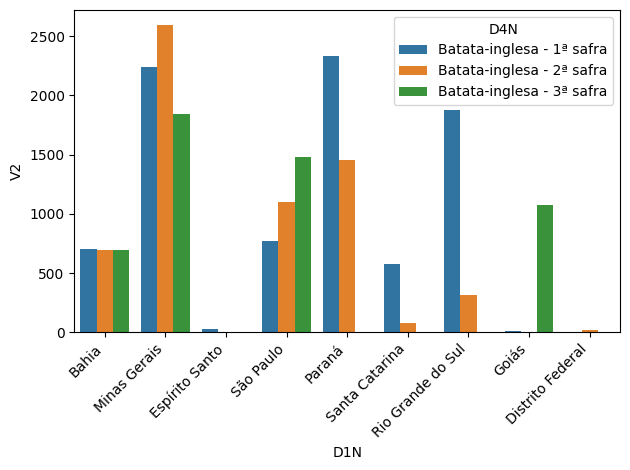

In [ ]:
data_batata_inglesa_uf['V'] = data_batata_inglesa_uf['V'].replace(['-', '...'], np.nan).astype(float).astype(pd.Int64Dtype())
data_batata_inglesa_uf['V2'] = data_batata_inglesa_uf['V']/1000
data_batata_inglesa_uf['D2N'] = data_batata_inglesa_uf['D2N'].astype(float)
data_batata_inglesa_uf = data_batata_inglesa_uf[data_batata_inglesa_uf['V2']>1]
sbn.barplot(
    data = data_batata_inglesa_uf[data_batata_inglesa_uf["D3N"]=="Quantidade produzida"],
    x = 'D1N',
    y = 'V2',
     native_scale = True,
    estimator = 'sum',
    errorbar = None,
    hue = 'D4N'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()